In [208]:
#to check for gpa
!nvidia-smi

Tue Nov  7 13:00:06 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   76C    P0    34W /  70W |    609MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [209]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [210]:
import os
path = "/content/drive/MyDrive/Deep Learning/Bank Customer Churn Prediction"
os.chdir(path)

In [211]:
!pwd

/content/drive/MyDrive/Deep Learning/Bank Customer Churn Prediction


In [212]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
import matplotlib.pyplot as plt

In [213]:
df=pd.read_csv("https://raw.githubusercontent.com/sagnikghoshcr7/Bank-Customer-Churn-Prediction/master/Churn_Modelling.csv")


In [214]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [215]:
df.drop(['RowNumber','CustomerId','Surname'],axis=1,inplace=True)

In [216]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [217]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [218]:
df.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [219]:
numerical_cols = list(df.dtypes[df.dtypes!='O'].index)
numerical_cols

['CreditScore',
 'Age',
 'Tenure',
 'Balance',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember',
 'EstimatedSalary',
 'Exited']

In [220]:
categorical_cols = list(df.dtypes[df.dtypes=='O'].index)
categorical_cols

['Geography', 'Gender']

In [221]:
df['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [222]:
df['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [223]:
df=pd.get_dummies(df,columns=["Geography","Gender"],drop_first=True)

In [224]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [225]:
X = df.drop(['Exited'],axis=1)

In [226]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


In [227]:
y = df[['Exited']]

In [228]:
y.head()

,Exited
0,1
1,0
2,1
3,0
4,0


In [229]:
X_train_full,X_test,y_train_full,y_test = train_test_split(X,y,random_state=42,test_size=0.25)

In [230]:
print(X_train_full.shape)
print(X_test.shape)
print(y_train_full.shape)
print(y_test.shape)

(7500, 11)
(2500, 11)
(7500, 1)
(2500, 1)


In [231]:
X_train,X_valid,y_train,y_valid = train_test_split(X_train_full,y_train_full,random_state=42,test_size=0.25)

In [232]:
print(X_train.shape)
print(X_valid.shape)
print(y_train.shape)
print(y_valid.shape)

(5625, 11)
(1875, 11)
(5625, 1)
(1875, 1)


In [233]:
LAYERS = [
         tf.keras.layers.Dense(30, activation="relu", input_shape = X_train.shape[1:],name='input_layer'),
         tf.keras.layers.Dense(10, activation="relu",name='hidden_layer1'),
         tf.keras.layers.Dense(5, activation='relu',name='hidden_layer2'),
         tf.keras.layers.Dense(1,activation='sigmoid',name='output_layer')

]

In [234]:
model = tf.keras.models.Sequential(LAYERS)

In [235]:
model.layers

In [236]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 30)                360       
                                                                 
 hidden_layer1 (Dense)       (None, 10)                310       
                                                                 
 hidden_layer2 (Dense)       (None, 5)                 55        
                                                                 
 output_layer (Dense)        (None, 1)                 6         
                                                                 
Total params: 731 (2.86 KB)
Trainable params: 731 (2.86 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [237]:
loss_function = "binary_crossentropy"
optimizer = "adam"
metrics= ["accuracy"]

model.compile(optimizer=optimizer,loss=loss_function,metrics=metrics)

In [238]:
# Log

import time

def get_log_path(log_dir="logs/fit"):
  fileName = time.strftime("log_%Y_%m_%d_%H_%M_%S")
  logs_path = os.path.join(log_dir, fileName)
  print(f"Saving logs at {logs_path}")
  return logs_path

log_dir = get_log_path()
tb_cb = tf.keras.callbacks.TensorBoard(log_dir=log_dir)

Saving logs at logs/fit/log_2023_11_07_13_01_35


In [239]:
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)

In [240]:
CKPT_path = "Model_ckpt.h5"
checkpointing_cb = tf.keras.callbacks.ModelCheckpoint(CKPT_path, save_best_only=True)

In [241]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)


In [242]:
EPOCHS = 25
VALIDATION_SET = (X_valid, y_valid)

In [243]:
#model_history=model.fit(X_train,y_train,validation_split=0.33,batch_size=10,epochs=50)
model_history = model.fit(X_train, y_train, epochs=EPOCHS,validation_data=VALIDATION_SET, batch_size=10,verbose=1,
                          callbacks=[tb_cb, early_stopping_cb,checkpointing_cb])

Epoch 1/25
563/563 [==============================] - 6s 7ms/step - loss: 0.5259 - accuracy: 0.7623 - val_loss: 0.4270 - val_accuracy: 0.8085
Epoch 2/25
 30/563 [>.............................] - ETA: 1s - loss: 0.4424 - accuracy: 0.8067

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


563/563 [==============================] - 3s 5ms/step - loss: 0.3987 - accuracy: 0.8340 - val_loss: 0.3896 - val_accuracy: 0.8299
Epoch 3/25
563/563 [==============================] - 2s 4ms/step - loss: 0.3635 - accuracy: 0.8505 - val_loss: 0.3668 - val_accuracy: 0.8496
Epoch 4/25
563/563 [==============================] - 3s 4ms/step - loss: 0.3498 - accuracy: 0.8555 - val_loss: 0.3593 - val_accuracy: 0.8507
Epoch 5/25
563/563 [==============================] - 3s 6ms/step - loss: 0.3425 - accuracy: 0.8572 - val_loss: 0.3606 - val_accuracy: 0.8507
Epoch 6/25
563/563 [==============================] - 3s 5ms/step - loss: 0.3393 - accuracy: 0.8583 - val_loss: 0.3599 - val_accuracy: 0.8581
Epoch 7/25
563/563 [==============================] - 2s 4ms/step - loss: 0.3360 - accuracy: 0.8574 - val_loss: 0.3594 - val_accuracy: 0.8507
Epoch 8/25
563/563 [==============================] - 3s 5ms/step - loss: 0.3340 - accuracy: 0.8626 - val_loss: 0.3578 - val_accuracy: 0.8592
Epoch 9/25
563/56

In [244]:
model_history.params

{'verbose': 1, 'epochs': 25, 'steps': 563}

In [245]:
pd.DataFrame(model_history.history)

,loss,accuracy,val_loss,val_accuracy
0,0.525941,0.762311,0.426971,0.808533
1,0.398731,0.833956,0.389580,0.829867
2,0.363515,0.850489,0.366826,0.849600
3,0.349849,0.855467,0.359312,0.850667
4,0.342474,0.857244,0.360598,0.850667
5,0.339345,0.858311,0.359921,0.858133
6,0.335960,0.857422,0.359407,0.850667
7,0.333987,0.862578,0.357773,0.859200
8,0.331111,0.862222,0.359520,0.857067
9,0.329856,0.862222,0.358330,0.851733


<Axes: >

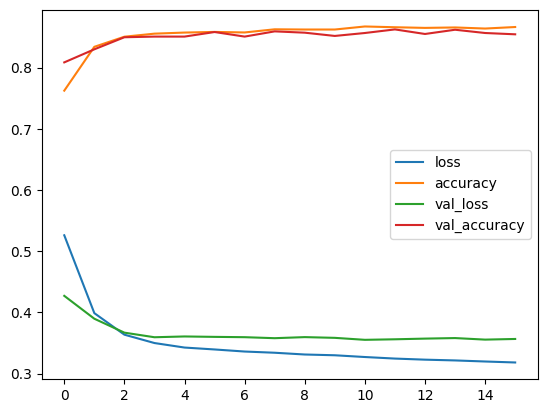

In [246]:
# summarize history for accuracy
pd.DataFrame(model_history.history).plot()

In [247]:
model.evaluate(X_test, y_test)

79/79 [==============================] - 0s 2ms/step - loss: 0.3551 - accuracy: 0.8572


[0.35511550307273865, 0.857200026512146]

In [276]:
#for first 10 samples
actual = y_test[:10]
print(actual)
x_sample = X_test[:10]
y_sample = model.predict(x_sample)
#y_sample = (y_sample>0.5)
y_sample=y_sample.argmax(axis=-1)

print(y_sample)
from sklearn.metrics import accuracy_score
score=accuracy_score(actual,y_sample)
score

      Exited
6252       0
4684       0
1731       0
4742       0
4521       0
6340       0
576        0
5202       1
6363       0
439        0
1/1 [==============================] - 0s 18ms/step
[0 0 0 0 0 0 0 0 0 0]


0.9

In [269]:
y_pred=model.predict(X_test)
#y_pred = (y_pred>0.5)
y_pred

79/79 [==============================] - 0s 2ms/step


array([[0.05014483],
       [0.02269545],
       [0.19803737],
       ...,
       [0.04843118],
       [0.14965212],
       [0.0454458 ]], dtype=float32)

In [272]:
y_pred=y_pred.argmax(axis=-1)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [273]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[2003,    0],
       [ 497,    0]])

In [265]:
from sklearn.metrics import accuracy_score
score=accuracy_score(y_test,y_pred)
score

0.8012